# example_histogram.py

In [131]:
import h5py
import os
import numpy as np
import matplotlib.pyplot as plt
cwd = os.getcwd()

In [132]:
#Open the data file
filepath = cwd + '/demo.hdf'
f = h5py.File(filepath, 'r')

#Show all channels available in file
chanIDs = f['DYNAMIC DATA']
chanIDs

<HDF5 group "/DYNAMIC DATA" (142 members)>

In [133]:
print("Channels available in this data file")
print(list(chanIDs.keys()))

Channels available in this data file
['ch_0', 'ch_1', 'ch_10', 'ch_100', 'ch_101', 'ch_102', 'ch_103', 'ch_104', 'ch_105', 'ch_106', 'ch_107', 'ch_108', 'ch_109', 'ch_11', 'ch_110', 'ch_111', 'ch_112', 'ch_113', 'ch_114', 'ch_115', 'ch_116', 'ch_117', 'ch_118', 'ch_119', 'ch_12', 'ch_120', 'ch_121', 'ch_122', 'ch_123', 'ch_124', 'ch_125', 'ch_126', 'ch_127', 'ch_128', 'ch_129', 'ch_13', 'ch_130', 'ch_131', 'ch_132', 'ch_133', 'ch_134', 'ch_135', 'ch_136', 'ch_137', 'ch_138', 'ch_139', 'ch_14', 'ch_140', 'ch_141', 'ch_15', 'ch_16', 'ch_17', 'ch_18', 'ch_19', 'ch_2', 'ch_20', 'ch_21', 'ch_22', 'ch_23', 'ch_24', 'ch_25', 'ch_26', 'ch_27', 'ch_28', 'ch_29', 'ch_3', 'ch_30', 'ch_31', 'ch_32', 'ch_33', 'ch_34', 'ch_35', 'ch_36', 'ch_37', 'ch_38', 'ch_39', 'ch_4', 'ch_40', 'ch_41', 'ch_42', 'ch_43', 'ch_44', 'ch_45', 'ch_46', 'ch_47', 'ch_48', 'ch_49', 'ch_5', 'ch_50', 'ch_51', 'ch_52', 'ch_53', 'ch_54', 'ch_55', 'ch_56', 'ch_57', 'ch_58', 'ch_59', 'ch_6', 'ch_60', 'ch_61', 'ch_62', 'ch_63', 

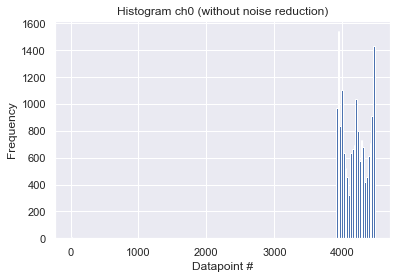

In [134]:
#Plot a sample dataset
ChannelName = 'ch_0'
dset = chanIDs[ChannelName]['MEASURED']
plt.hist(dset, bins='auto')  # arguments are passed to np.histogram
plt.title("Histogram ch0 (without noise reduction)")
plt.xlabel("Datapoint #")
plt.ylabel("Frequency")
plt.show()

In [137]:
dset[6:-1]

array([4056., 4056., 4056., ..., 4120., 4120., 4120.], dtype=float32)

Max of dataset: 4480.0
Min of dataset: 0.0


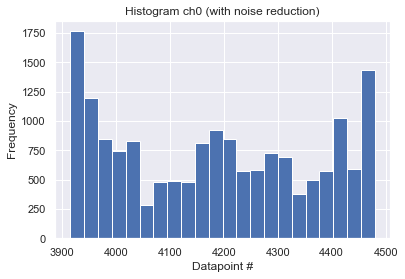

Max of dataset (wo noise): 4480.0
Min of dataset (wo noise): 3916.0


In [128]:
print("Max of dataset: " + str(max(dset)))
print("Min of dataset: " + str(min(dset)))

# Determined that initial 0 values are noise because of .....???
# They may not be noise. They may be noise. You may need to make your own determination of what is and isn't noise
# How do you determine what's noise? Great question! The answer is.....
plt.hist(dset[6:-1], bins='auto')  # arguments are passed to np.histogram
plt.title("Histogram ch0 (with noise reduction)")
plt.xlabel("Datapoint #")
plt.ylabel("Frequency")
plt.show()

print("Max of dataset (wo noise): " + str(max(dset[6:-1])))
print("Min of dataset (wo noise): " + str(min(dset[6:-1])))

#Close the file
f.close()

# Vaughn's work

In [13]:
import pandas as pd
import seaborn as sns
sns.set()

In [55]:
def get_keys_in_file(hdf_file_name):
    cwd = os.getcwd()
    f = h5py.File(filepath, 'r')
    print("keys in file:")
    print(list(h5py.File(filepath).keys()))

In [58]:
list(h5py.File(filepath)['DYNAMIC DATA'].keys())

['ch_0',
 'ch_1',
 'ch_10',
 'ch_100',
 'ch_101',
 'ch_102',
 'ch_103',
 'ch_104',
 'ch_105',
 'ch_106',
 'ch_107',
 'ch_108',
 'ch_109',
 'ch_11',
 'ch_110',
 'ch_111',
 'ch_112',
 'ch_113',
 'ch_114',
 'ch_115',
 'ch_116',
 'ch_117',
 'ch_118',
 'ch_119',
 'ch_12',
 'ch_120',
 'ch_121',
 'ch_122',
 'ch_123',
 'ch_124',
 'ch_125',
 'ch_126',
 'ch_127',
 'ch_128',
 'ch_129',
 'ch_13',
 'ch_130',
 'ch_131',
 'ch_132',
 'ch_133',
 'ch_134',
 'ch_135',
 'ch_136',
 'ch_137',
 'ch_138',
 'ch_139',
 'ch_14',
 'ch_140',
 'ch_141',
 'ch_15',
 'ch_16',
 'ch_17',
 'ch_18',
 'ch_19',
 'ch_2',
 'ch_20',
 'ch_21',
 'ch_22',
 'ch_23',
 'ch_24',
 'ch_25',
 'ch_26',
 'ch_27',
 'ch_28',
 'ch_29',
 'ch_3',
 'ch_30',
 'ch_31',
 'ch_32',
 'ch_33',
 'ch_34',
 'ch_35',
 'ch_36',
 'ch_37',
 'ch_38',
 'ch_39',
 'ch_4',
 'ch_40',
 'ch_41',
 'ch_42',
 'ch_43',
 'ch_44',
 'ch_45',
 'ch_46',
 'ch_47',
 'ch_48',
 'ch_49',
 'ch_5',
 'ch_50',
 'ch_51',
 'ch_52',
 'ch_53',
 'ch_54',
 'ch_55',
 'ch_56',
 'ch_57',
 'ch

## hdf_file_to_df

In [98]:
def hdf_file_to_df(hdf_file_name):
    cwd = os.getcwd()
    f = h5py.File(filepath, 'r')
    dd_keys = list(f['DYNAMIC DATA'].keys())
    
    #matrix = np.array()
    matrix = []
    
    for key in dd_keys:
        one_channel = np.array(f['DYNAMIC DATA'][key]['MEASURED'])
        matrix.append(one_channel)
        #print(len(matrix))
    
    np_matrix = np.array(matrix)
    return pd.DataFrame(np_matrix.T, columns=dd_keys)

In [100]:
demo_df = hdf_file_to_df('demo.hdf')

In [101]:
demo_df

,ch_0,ch_1,ch_10,ch_100,ch_101,ch_102,ch_103,ch_104,ch_105,ch_106,...,ch_90,ch_91,ch_92,ch_93,ch_94,ch_95,ch_96,ch_97,ch_98,ch_99
0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.000000,0.0,127.445404,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.000000,0.0,127.445404,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.000000,0.0,127.445404,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,293601280.0,0.0,0.0,0.0,0.0,0.0,32768.0
6,4056.0,0.0,0.000000,9430.0,127.785248,128.0,0.0,0.0,128.0,0.0,...,0.0,112640.0,19072.0,293601280.0,128.0,0.0,0.0,0.0,0.0,32768.0
7,4056.0,0.0,0.000000,9430.0,127.785248,128.0,0.0,0.0,128.0,0.0,...,0.0,112640.0,19072.0,293601280.0,128.0,0.0,0.0,0.0,0.0,32768.0
8,4056.0,0.0,0.000000,9430.0,127.394623,128.0,0.0,0.0,128.0,0.0,...,0.0,112640.0,19072.0,293601280.0,128.0,0.0,0.0,0.0,0.0,32768.0
9,4056.0,0.0,0.000000,9430.0,127.394623,128.0,0.0,0.0,128.0,0.0,...,0.0,112640.0,19072.0,293601280.0,128.0,0.0,0.0,0.0,0.0,32768.0


In [111]:
slice_df = demo_df.iloc[:, :5]
slice_df

,ch_0,ch_1,ch_10,ch_100,ch_101
0,0.0,0.0,0.000000,0.0,0.000000
1,0.0,0.0,0.000000,0.0,0.000000
2,0.0,0.0,0.000000,0.0,0.000000
3,0.0,0.0,0.000000,0.0,127.445404
4,0.0,0.0,0.000000,0.0,127.445404
5,0.0,0.0,0.000000,0.0,127.445404
6,4056.0,0.0,0.000000,9430.0,127.785248
7,4056.0,0.0,0.000000,9430.0,127.785248
8,4056.0,0.0,0.000000,9430.0,127.394623
9,4056.0,0.0,0.000000,9430.0,127.394623


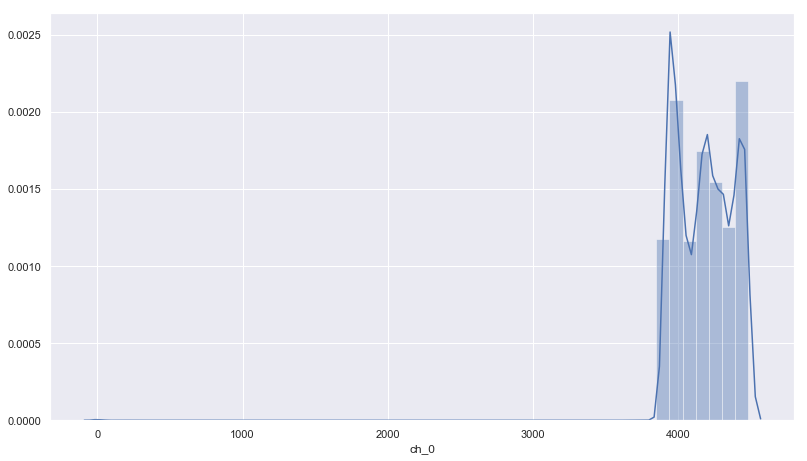

In [123]:
s = 1.2
plt.figure(figsize=(16/s, 9/s))

sns.distplot(demo_df['ch_0'])
#sns.distplot(demo_df['ch_1'], norm_hist=True)

#for i in range(10):
    #sns.distplot(demo_df[demo_df.columns[i]])

## graphing over time

In [141]:
len(demo_df['ch_0'])

16748

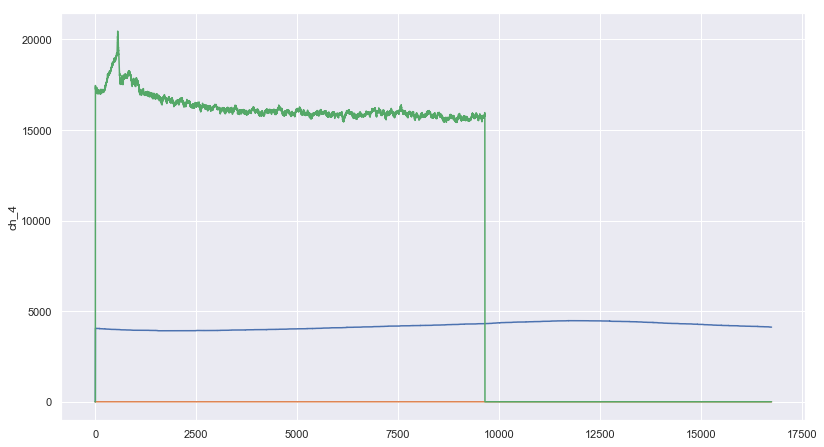

In [146]:
s = 1.2
plt.figure(figsize=(16/s, 9/s))

sns.lineplot(range(len(demo_df['ch_0'])), demo_df['ch_0'])
sns.lineplot(range(len(demo_df['ch_0'])), demo_df['ch_1'])
sns.lineplot(range(len(demo_df['ch_0'])), demo_df['ch_4'])